# Assignment 3

#### Student ID: *Double click here to fill the Student ID*

#### Name: *Double click here to fill the name*

## Q1: Analyze StackOverflow dataset using SQL

Kaggle has a rich number of [BigQuery](https://www.kaggle.com/datasets?fileType=bigQuery) and [SQLite](https://www.kaggle.com/datasets?fileType=sqlite) datasets that you can practice your SQL skill.

In this question, we are going to examine the StackOverflow dataset. [Stack Overflow](https://stackoverflow.com/) is a popular question and answer site for technical questions. We will explore how to set up a service that identifies the Stack Overflow users who have demonstrated expertise within a specific field by answering related questions about it.

Hint: It is recommended to answer this question in Kaggle, where you can access the dataset directly. In addition, refer to https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf and our laboratory for useful commands.

Firstly, if you are using colab, use the following code snippet to setup the client. For more detail, please refer to our lab.

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline

In [47]:
from google.cloud import bigquery

from google.oauth2 import service_account

key_path = "green-diagram-350014-afcc119186fc.json"

credentials = service_account.Credentials.from_service_account_file(
    key_path, scopes=["https://www.googleapis.com/auth/cloud-platform"],
)

client = bigquery.Client(credentials=credentials, project=credentials.project_id,)

(a) Try to print the names of all tables available in the dataset first. 
Then, try to print the table schema of the `posts_answers` table and the `posts_questions` tables. Finally, preview the first ten rows of the above two tables by retrieving the data frame.

Hint: the dataset can be access via `dataset_ref = client.dataset("stackoverflow", project="bigquery-public-data")`

In [48]:
# coding your answer here.
dataset_ref = client.dataset("stackoverflow", project="bigquery-public-data")
dataset = client.get_dataset(dataset_ref)
# Get a list of available tables 
tables = list(client.list_tables(dataset))
for table in tables:  
    print(table.table_id)

badges
comments
post_history
post_links
posts_answers
posts_moderator_nomination
posts_orphaned_tag_wiki
posts_privilege_wiki
posts_questions
posts_tag_wiki
posts_tag_wiki_excerpt
posts_wiki_placeholder
stackoverflow_posts
tags
users
votes


In [49]:
# Construct a reference to the "posts_answers" table
answers_table_ref = dataset_ref.table("posts_answers")
# API request - fetch the table
answers_table = client.get_table(answers_table_ref)

answers_table.schema

[SchemaField('id', 'INTEGER', 'NULLABLE', None, ()),
 SchemaField('title', 'STRING', 'NULLABLE', None, ()),
 SchemaField('body', 'STRING', 'NULLABLE', None, ()),
 SchemaField('accepted_answer_id', 'STRING', 'NULLABLE', None, ()),
 SchemaField('answer_count', 'STRING', 'NULLABLE', None, ()),
 SchemaField('comment_count', 'INTEGER', 'NULLABLE', None, ()),
 SchemaField('community_owned_date', 'TIMESTAMP', 'NULLABLE', None, ()),
 SchemaField('creation_date', 'TIMESTAMP', 'NULLABLE', None, ()),
 SchemaField('favorite_count', 'STRING', 'NULLABLE', None, ()),
 SchemaField('last_activity_date', 'TIMESTAMP', 'NULLABLE', None, ()),
 SchemaField('last_edit_date', 'TIMESTAMP', 'NULLABLE', None, ()),
 SchemaField('last_editor_display_name', 'STRING', 'NULLABLE', None, ()),
 SchemaField('last_editor_user_id', 'INTEGER', 'NULLABLE', None, ()),
 SchemaField('owner_display_name', 'STRING', 'NULLABLE', None, ()),
 SchemaField('owner_user_id', 'INTEGER', 'NULLABLE', None, ()),
 SchemaField('parent_id', '

In [50]:
# Construct a reference to the "posts_questions" table
questions_table_ref = dataset_ref.table("posts_questions")

# API request - fetch the table
questions_table = client.get_table(questions_table_ref)

questions_table.schema

[SchemaField('id', 'INTEGER', 'NULLABLE', None, ()),
 SchemaField('title', 'STRING', 'NULLABLE', None, ()),
 SchemaField('body', 'STRING', 'NULLABLE', None, ()),
 SchemaField('accepted_answer_id', 'INTEGER', 'NULLABLE', None, ()),
 SchemaField('answer_count', 'INTEGER', 'NULLABLE', None, ()),
 SchemaField('comment_count', 'INTEGER', 'NULLABLE', None, ()),
 SchemaField('community_owned_date', 'TIMESTAMP', 'NULLABLE', None, ()),
 SchemaField('creation_date', 'TIMESTAMP', 'NULLABLE', None, ()),
 SchemaField('favorite_count', 'INTEGER', 'NULLABLE', None, ()),
 SchemaField('last_activity_date', 'TIMESTAMP', 'NULLABLE', None, ()),
 SchemaField('last_edit_date', 'TIMESTAMP', 'NULLABLE', None, ()),
 SchemaField('last_editor_display_name', 'STRING', 'NULLABLE', None, ()),
 SchemaField('last_editor_user_id', 'INTEGER', 'NULLABLE', None, ()),
 SchemaField('owner_display_name', 'STRING', 'NULLABLE', None, ()),
 SchemaField('owner_user_id', 'INTEGER', 'NULLABLE', None, ()),
 SchemaField('parent_id'

In [51]:
# Preview the first five lines of the "posts_questions" table
client.list_rows(answers_table, max_results=10).to_dataframe()

,id,title,body,accepted_answer_id,answer_count,comment_count,community_owned_date,creation_date,favorite_count,last_activity_date,last_edit_date,last_editor_display_name,last_editor_user_id,owner_display_name,owner_user_id,parent_id,post_type_id,score,tags,view_count
0,18,None,<p>For a table like this:</p>\n\n<pre><code>CR...,None,None,2,None,2008-08-01 05:12:44.193000+00:00,None,2016-06-02 05:56:26.060000+00:00,2016-06-02 05:56:26.060000+00:00,Jeff Atwood,126039,phpguy,None,17,2,59,None,None
1,165,None,"<p>You can use a <a href=""http://sharpdevelop....",None,None,0,None,2008-08-01 18:04:25.023000+00:00,None,2019-04-06 14:03:51.080000+00:00,2019-04-06 14:03:51.080000+00:00,None,1721793,user2189331,None,145,2,10,None,None
2,1028,None,<p>The VB code looks something like this:</p>\...,None,None,0,None,2008-08-04 04:58:40.300000+00:00,None,2013-02-07 13:22:14.680000+00:00,2013-02-07 13:22:14.680000+00:00,None,395659,user2189331,None,947,2,8,None,None
3,1073,None,<p>My first choice would be a dedicated heap t...,None,None,0,None,2008-08-04 07:51:02.997000+00:00,None,2015-09-01 17:32:32.120000+00:00,2015-09-01 17:32:32.120000+00:00,None,45459,user2189331,None,1069,2,29,None,None
4,1260,None,<p>I found the answer. all you have to do is a...,None,None,0,None,2008-08-04 14:06:02.863000+00:00,None,2016-12-20 08:38:48.867000+00:00,2016-12-20 08:38:48.867000+00:00,None,1221571,Jin,None,1229,2,1,None,None
5,2216,None,"<p>Thxm, Mc! <a href=""http://asm.objectweb.org...",None,None,0,None,2008-08-05 12:50:59.020000+00:00,None,2016-10-13 12:50:44.040000+00:00,2016-10-13 12:50:44.040000+00:00,None,1571180,bill,None,2092,2,4,None,None
6,2498,None,<p>The two self-balancing <code>BST</code>s I'...,None,None,0,None,2008-08-05 15:50:05.120000+00:00,None,2013-02-07 14:40:26.280000+00:00,2013-02-07 14:40:26.280000+00:00,None,395659,user316,None,2481,2,0,None,None
7,2977,None,"<p>I would look at <a href=""http://www.google....",None,None,0,None,2008-08-06 00:16:25.020000+00:00,None,2008-08-06 16:20:17.193000+00:00,2008-08-06 16:20:17.193000+00:00,Justin Standard,92,user2189331,None,2968,2,7,None,None
8,6206,None,<p>For a 3x3 system of linear equations I gues...,None,None,0,None,2008-08-08 17:59:27.907000+00:00,None,2016-12-20 05:58:05.240000+00:00,2016-12-20 05:58:05.240000+00:00,None,1997093,Pall Melsted,None,769,2,7,None,None
9,6620,None,<p><strong>Pros of config file:</strong> </p>...,None,None,4,None,2008-08-09 04:51:59.773000+00:00,None,2011-02-25 13:13:38.733000+00:00,2011-02-25 13:13:38.733000+00:00,None,8418,user316,None,6607,2,43,None,None


In [52]:
# Preview the first five lines of the "posts_questions" table
client.list_rows(questions_table, max_results=10).to_dataframe()

,id,title,body,accepted_answer_id,answer_count,comment_count,community_owned_date,creation_date,favorite_count,last_activity_date,last_edit_date,last_editor_display_name,last_editor_user_id,owner_display_name,owner_user_id,parent_id,post_type_id,score,tags,view_count
0,320268,Html.ActionLink doesn’t render # properly,<p>When using Html.ActionLink passing a string...,NaN,0,0,None,2008-11-26 10:42:37.477000+00:00,0.0,2009-02-06 20:13:54.370000+00:00,NaT,None,NaN,Paulo,NaN,None,1,0,asp.net-mvc,380
1,324003,Primitive recursion,<p>how will i define the function 'simplify' ...,NaN,0,0,None,2008-11-27 15:12:37.497000+00:00,0.0,2012-09-25 19:54:40.597000+00:00,2012-09-25 19:54:40.597000+00:00,Marcin,1288.0,None,41000.0,None,1,0,haskell|lambda|functional-programming|lambda-c...,488
2,390605,While vs. Do While,<p>I've seen both the blocks of code in use se...,390608.0,0,0,None,2008-12-24 01:49:54.230000+00:00,2.0,2008-12-24 03:08:55.897000+00:00,NaT,None,NaN,Unkwntech,115.0,None,1,0,language-agnostic|loops,11086
3,413246,Protect ASP.NET Source code,<p>Im currently doing some research in how to ...,NaN,0,0,None,2009-01-05 14:23:51.040000+00:00,0.0,2009-03-24 21:30:22.370000+00:00,2009-01-05 14:42:28.257000+00:00,Tom Anderson,13502.0,Velnias,NaN,None,1,0,asp.net|deployment|obfuscation,4811
4,454921,"Difference between ""int[] myArray"" and ""int my...",<blockquote>\n <p><strong>Possible Duplicate:...,454928.0,0,0,None,2009-01-18 10:22:52.177000+00:00,0.0,2009-01-18 10:30:50.930000+00:00,2017-05-23 11:49:26.567000+00:00,None,-1.0,Evan Fosmark,49701.0,None,1,0,java|arrays,795
5,472695,Looking for WPF/XAML example that gets XML fro...,<p>I can imagine WPF has a very easy way to gr...,NaN,0,2,None,2009-01-23 12:21:50.073000+00:00,NaN,2009-01-23 13:23:29.543000+00:00,2009-01-23 12:41:17.037000+00:00,Fabian Steeg,18154.0,Edward Tanguay,4639.0,None,1,0,.net|wpf|xaml|rest,653
6,587584,What is the preferred way to declare a Java ar...,<blockquote>\n <p><strong>Possible Duplicate:...,587594.0,0,0,None,2009-02-25 19:57:22.633000+00:00,0.0,2009-02-25 23:37:23.213000+00:00,2017-05-23 12:20:37.303000+00:00,Eddie,-1.0,Simon,24039.0,None,1,0,java|arrays|declaration,626
7,597572,How do I create a windows service with Python,<p>I really need my python program to run as a...,NaN,0,0,None,2009-02-28 05:47:08.330000+00:00,0.0,2020-10-14 06:15:14.207000+00:00,2020-10-14 06:15:14.207000+00:00,eliben,100297.0,minty,4491.0,None,1,0,python|windows|service,3494
8,612711,Best C# Profiler?,<p>Recently I used RedGate ANTS profiler which...,NaN,0,0,None,2009-03-04 22:16:01.557000+00:00,2.0,2013-01-14 21:17:03.763000+00:00,2010-01-25 15:15:51.767000+00:00,Gortok,164901.0,Joan Venge,51816.0,None,1,0,c#|.net|performance|profiler,20899
9,651291,Securing a .NET Application,<h3>Duplicate:</h3>\n<blockquote>\n<p><a href=...,651375.0,0,0,None,2009-03-16 17:07:23.660000+00:00,1.0,2010-06-09 16:17:12.787000+00:00,2020-06-20 09:12:55.060000+00:00,Rich B,-1.0,beakersoft,19638.0,None,1,0,.net|security|obfuscation|reverse-engineering,5968


(b) `posts_questions` has a column called tags which lists the topics/technologies each question is about. Please write a query that selects the `id`, `title`, `parent_id` and `owner_display_name` columns from the `posts_questions` table and follow the below restrictions. 

* Restrict the results to rows that contain the word 'sql' in the `tags` column. (Remember the `SELET...WHERE` clause. Do not use wildcard here.)
* Rename the column name `title` to `question_title` (Remember the `AS` clause)
* Sort the results by the `score` column in descending order (Remember the `ORDER BY` clause)

In the retrieve data frame, how many rows do you have? How many rows have non-null `ower_dispaly_name`? (Which means the `owner_display_name` is not 'None').

In [53]:
# coding your answer here.
questions_query = """
                  SELECT id, title AS question_title, owner_display_name
                  FROM `bigquery-public-data.stackoverflow.posts_questions`
                  WHERE tags = 'sql'
                  ORDER BY score DESC
                  """

# Set up the query (cancel the query if it would use too much of 
# your quota, with the limit set to 1 GB)
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
questions_query_job = client.query(questions_query, job_config=safe_config)

# API request - run the query, and return a pandas DataFrame
questions_results = questions_query_job.to_dataframe()

In [54]:
questions_results

,id,question_title,owner_display_name
0,3556890,Altering a column to be nullable,None
1,6308594,How can I copy data from one column to another...,None
2,59294,"In SQL, what's the difference between count(co...",Bill the Lizard
3,1840847,Can someone copyright a SQL query?,None
4,1271810,Counting null and non-null values in a single ...,prabin
...,...,...,...
23483,17980418,How to debug in sql(Oracle),None
23484,45863241,How to improve performance of this query,None
23485,51526618,SQL (employees with same birthdate),None
23486,25599349,How can I quickly solve this query?,None


In [55]:
questions_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23488 entries, 0 to 23487
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  23488 non-null  int64 
 1   question_title      23488 non-null  object
 2   owner_display_name  656 non-null    object
dtypes: int64(1), object(2)
memory usage: 550.6+ KB


We have 23488 rows here and 656 rows are non-null.

(c) `posts_answers` has a column called `parent_id` which identifies the ID of the question each answer corresponds to. You can then join two tables by the `parent_id` in `posts_answers` and the `id` in `posts_questions`. `posts_answers` also has an `owner_user_id` column which specifies the ID of the user who answered the question. 

Now, write a query that has a single row for each user who answered at least one question with a tag that equals to string `sql`. Your results should have two columns (Remember the `SELET...WHERE` clause) and follow the below restrictions:

* `owner_user_id` - contains the `owner_user_id` column from the `posts_answers` table (Remember the `INNER JOIN` clause)
* `number_of_answers` - contains the number of answers the user has written to `sql` related questions (Remember the `AS`, `GROUP BY` and `COUNT` clause)
* Filter out the rows whose `number_of_answers` is smaller or equal to 2 (Remember the `HAVING` clause)

In the retrieve data frame, which user answers most questions in the sql domain? The user is an expert in the SQL domain and is the author of many SQL books, try to find the name of a book the user wrote.

Hint: You can find the public user profile by appending the ID after https://stackoverflow.com/users/

In [56]:
# coding your answer here.

bigquery_experts_query = """
                         SELECT a.owner_user_id, COUNT(1) AS number_of_answers
                         FROM `bigquery-public-data.stackoverflow.posts_questions` AS q
                         INNER JOIN `bigquery-public-data.stackoverflow.posts_answers` AS a
                             ON q.id = a.parent_Id
                         WHERE q.tags = 'sql'
                         GROUP BY a.owner_user_id
                         HAVING COUNT(1) > 2
                         """

# Set up the query (cancel the query if it would use too much of 
# your quota, with the limit set to 1 GB)
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
bigquery_experts_query_job = client.query(bigquery_experts_query, job_config=safe_config)

# API request - run the query, and return a pandas DataFrame
bigquery_experts_results = bigquery_experts_query_job.to_dataframe()

In [57]:
bigquery_experts_results

,owner_user_id,number_of_answers
0,5529445.0,211
1,7667946.0,6
2,14535517.0,25
3,9937026.0,6
4,2319407.0,23
...,...,...
2346,624998.0,3
2347,40077.0,3
2348,3195030.0,3
2349,1336386.0,3


In [58]:
bigquery_experts_results.sort_values('number_of_answers', ascending=False)

,owner_user_id,number_of_answers
91,1144035.0,4287
1060,NaN,407
1258,1863229.0,369
2007,330315.0,289
449,10498828.0,236
...,...,...
1221,1396061.0,3
1220,357429.0,3
1782,1545777.0,3
1218,15592.0,3


The user is Gordon Linoff, who wrote a book entitled with "Data Analysis Using SQL and Excel"

## Q2: Data cleaning with Melbourne Housing dataset

In this question, you are going to practice the data preparation skill that is often used in a real-world project.

The dataset is a snapshot of a [dataset](https://www.kaggle.com/datasets/anthonypino/melbourne-housing-market) created by Tony Pino. It was scraped from publicly available results posted every week from https://www.domain.com.au/. The dataset includes Address, Type of Real estate, Suburb, Method of Selling, Rooms, Price, Real Estate Agent, Date of Sale and distance from the central business district, etc.

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error

# Function for comparing different approaches
def scoring(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=20, random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

# Load the data
data = pd.read_csv('melb_data.csv')

# Select target
y = data.Price

# To keep things simple, we'll split the columns into numerical can categorical features
melb_predictors = data.drop(['Price', 'Date', 'Address'], axis=1)
cat_col = melb_predictors.select_dtypes(exclude=['int64','float64'])

# Divide data into training and validation subsets
X, X_v, y_train, y_valid = train_test_split(melb_predictors, y, train_size=0.8, test_size=0.2, random_state=0)
X_train = X.select_dtypes(exclude=['object'])
X_valid = X_v.select_dtypes(exclude=['object'])
X_train_cat = X.select_dtypes(exclude=['int64','float64'])
X_valid_cat = X_v.select_dtypes(exclude=['int64','float64'])

(a) Firstly, try to find out which columns contain missing values. Then, try to calculate the percentage of the missing values in the dataset.  

Hint: You should count the missing rate base on the original `data` matrix

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

Car, BuildingArea, YearBuilt and CouncilArea contain missing value.

In [62]:
# get the number of missing data points per column
missing_values_count = data.isnull().sum()

# how many total missing values do we have?
total_cells = np.product(data.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100

In [63]:
total_missing #13580*4 - 12211 - 8205 - 7130 - 13518

13256

The missing rate is calculated below:

In [64]:
percent_missing 

4.648292306613367

(b) Considering only the numerical columns in this question. We are going to compare the MAE between the three data cleaning approach.

1. Removing all the columns with empty values. 
2. Replace missing values with the median value along each column.
3. Use the iterative imputation method and set the regressor to KNN regressor with 20 neighbors.

Use the `scoring_mae` function to perform regression and calculate the MAE for each approach. Finally, make some comments on the results.

Hint: Since we are working with both training and validation sets, try to drop the same columns in both data frames. In addition, you should apply the same transform when you impute the missing value.

In [65]:
# Get names of columns with missing values
cols_with_missing = [col for col in X_train.columns
                     if X_train[col].isnull().any()]

# Drop columns in training and validation data
reduced_X_train = X_train.drop(cols_with_missing, axis=1)
reduced_X_valid = X_valid.drop(cols_with_missing, axis=1)

print("MAE from Approach 1 (Drop columns with missing values):")
print(scoring(reduced_X_train, reduced_X_valid, y_train, y_valid))

MAE from Approach 1 (Drop columns with missing values):
181092.51315134304


In [66]:
# Imputation
my_imputer = SimpleImputer(strategy='median')
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))
imputed_X_valid = pd.DataFrame(my_imputer.transform(X_valid))

# Imputation removed column names; put them back
imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_valid.columns

print("MAE from Approach 2 (Imputation):")
print(scoring(imputed_X_train, imputed_X_valid, y_train, y_valid))

MAE from Approach 2 (Imputation):
171528.18218581247


In [67]:
from sklearn.neighbors import KNeighborsRegressor
 
 # You can also use other regressor as well (default is regularized linear regression)
est = KNeighborsRegressor(n_neighbors=20)
imp = IterativeImputer(random_state=42, estimator=est)
imputed_X_train = pd.DataFrame(imp.fit_transform(X_train))
imputed_X_valid = pd.DataFrame(imp.transform(X_valid))

# Imputation removed column names; put them back
imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_valid.columns

print("MAE from Approach 1 (Imputation):")
print(scoring(imputed_X_train, imputed_X_valid, y_train, y_valid))

MAE from Approach 1 (Imputation):
178009.84437285224


The fill with median approach works best in this situation.

(c) Considering only the categorical columns in this question. Find out which columns contain missing values first. Then, try to 

* Replace missing values with the most frequent value along each column. 
* Perform one-hot encoding for the categorical variables whose number of categories is smaller than 10; otherwise, use the label encoding for that column. 
* When there are unknown categories in the validation set, set it to all zeros for the one-hot encoding and set it to -1 for the label encoding.

Use the `scoring_mae` function to perform regression and calculate the MAE for the resulting data.

Hint: Since we are working with both training and validation sets, try to apply the same transform when you impute the missing data or encode the variables. You may find [ColumnTransformer](https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html) and the `handle_unknown` option in the encoder useful.

In [71]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [68]:
# coding your answer here.
X_train_cat.isnull().sum()

Suburb            0
Type              0
Method            0
SellerG           0
CouncilArea    1072
Regionname        0
dtype: int64

In [69]:
for a in X_train_cat.columns:
  print(X_train_cat[a].value_counts().count())

308
3
5
251
33
8


In [72]:
from sklearn.pipeline import Pipeline
categorical_transformer1 = Pipeline(
    steps=[("encoder", OneHotEncoder(handle_unknown="ignore"))]
)
categorical_transformer2 = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="most_frequent")), ("encoder", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1))]
)

In [73]:
categorical_features1 = ['Type', 'Method', 'Regionname']
categorical_features2 = ['Suburb', 'SellerG', 'CouncilArea']

In [74]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("cat1", categorical_transformer1, categorical_features1),
        ("cat2", categorical_transformer2, categorical_features2),
    ]
)

In [75]:
X_train_cat2 = preprocessor.fit_transform(X_train_cat)

In [81]:
X_valid_cat2 = preprocessor.transform(X_valid_cat)

In [83]:
print("MAE from Approach 1 (Imputation):")
print(scoring(X_train_cat2, X_valid_cat2, y_train, y_valid))

MAE from Approach 1 (Imputation):
269966.27297668945


(d) Combining the transformation in (b) and (c) to the original training and validation data split (`X` and `X_v`) and using the `scoring_mae` function to calculate the MAE. Make some comments on the results when comparing with (b) and (c).

Hint: Since we are working with both training and validation sets, try to apply the same transform when you impute the missing data or encode the variables. You may find [ColumnTransformer](https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html) useful.

In [84]:
from sklearn.pipeline import Pipeline
categorical_transformer1 = Pipeline(
    steps=[("encoder", OneHotEncoder(handle_unknown="ignore"))]
)
categorical_transformer2 = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="most_frequent")), ("encoder", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1))]
)
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median"))]
)

In [85]:
preprocessor2 = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, X_train.columns),
        ("cat1", categorical_transformer1, categorical_features1),
        ("cat2", categorical_transformer2, categorical_features2),
    ]
)

In [86]:
X_train_f = preprocessor2.fit_transform(X)

In [88]:
X_valid_f = preprocessor2.transform(X_v)

In [90]:
print("MAE from Approach 1 (Imputation):")
print(scoring(X_train_f, X_valid_f, y_train, y_valid))

MAE from Approach 1 (Imputation):
167282.4366838488


When combining numerical and categorical variables, we get the lowest loss.

## Q3: Feature engineering and selection with Ames housing dataset

In this question, we are going to examine several feature engineering and feature selection methods.

The dataset we are going to use is a modified version of the Ames housing dataset. The original data was compiled by Dean De Cock for use in data science education and published in [De Cock, D. (2011)](https://www.tandfonline.com/doi/abs/10.1080/10691898.2011.11889627). The modified version contains 2930 rows with 79 columns describing every aspect of residential homes in Ames, Iowa.  

In [95]:
from sklearn.model_selection import cross_val_score

# Note that after you call the following code your categorical variable will be label encoding
def score_dataset(X, y, model=RandomForestRegressor()):
    # Label encoding for categoricals
    for colname in X.select_dtypes(["category", "object"]):
        X[colname], _ = X[colname].factorize()
    # Metric for Housing competition is RMSLE (Root Mean Squared Log Error)
    score = cross_val_score(
        model, X, y, cv=5, scoring="neg_mean_squared_log_error",
    )
    score = -1 * score.mean()
    score = np.sqrt(score)
    return score


# Prepare data
df = pd.read_csv("ames.csv")

(a) First try to perform the k-means clustering with the following parameters:
* features: `FirstFlrSF`, `SecondFlrSF`,`GrLivArea`, `LotArea`, `TotalBsmtSF` 
* number of clusters: 10

Then, add the k-means label and cluster-distances features to your original dataset. Finally, perform the regression and calculate the RMLSE using the `scoring_rmsle` function.

Hint: You may find the `predict` and `transform` in the [k-means function](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) useful when you are generating the features. 

In [96]:
from sklearn.cluster import KMeans
# coding your answer here.
X = df.copy()
y = X.pop("SalePrice")

features = [
    "LotArea",
    "TotalBsmtSF",
    "FirstFlrSF",
    "SecondFlrSF",
    "GrLivArea",
]

# Standardize
X_scaled = X.loc[:, features]
X_scaled = (X_scaled - X_scaled.mean(axis=0)) / X_scaled.std(axis=0)

kmeans = KMeans(n_clusters=10, n_init=10, random_state=0)
X["Cluster"] = kmeans.fit_predict(X_scaled)

In [97]:
score_dataset(X, y)

0.14430962805619083

In [98]:
X_cd = kmeans.fit_transform(X_scaled)

# Label features and join to dataset
X_cd = pd.DataFrame(X_cd, columns=[f"Centroid_{i}" for i in range(X_cd.shape[1])])
X = X.join(X_cd)

In [99]:
X

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Centroid_0,Centroid_1,Centroid_2,Centroid_3,Centroid_4,Centroid_5,Centroid_6,Centroid_7,Centroid_8,Centroid_9
0,0,0,141.0,31770.0,0,0,0,0,0,0,...,2.977514,4.324979,4.172115,3.780258,16.792665,3.696276,3.032162,3.912313,13.097627,1.677604
1,0,1,80.0,11622.0,0,0,1,0,0,1,...,1.969544,1.879362,4.654799,2.754284,19.594509,0.461371,3.852233,1.941728,15.785445,5.026636
2,0,0,81.0,14267.0,0,0,0,0,0,0,...,0.644657,2.716520,3.743687,2.616186,19.030448,1.650239,2.135609,2.888012,14.058973,3.965749
3,0,0,93.0,11160.0,0,0,1,0,0,0,...,2.868083,5.244512,3.885630,4.432911,19.392116,4.576079,0.995900,5.513141,11.373003,4.586658
4,1,0,74.0,13830.0,0,0,0,0,0,1,...,2.333623,1.313746,2.689990,0.738670,19.225117,2.175157,3.569021,2.691082,14.749591,4.469214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,6,0,37.0,7937.0,0,0,0,0,0,2,...,1.530951,1.868376,4.422977,2.623370,19.983709,0.237774,3.464557,2.095992,15.515254,5.185956
2926,0,0,0.0,8885.0,0,0,0,3,0,1,...,1.961062,1.785543,4.675534,2.747987,19.937172,0.257994,3.887002,1.888941,15.897940,5.303318
2927,4,0,62.0,10441.0,0,0,1,0,0,1,...,1.718819,1.842252,4.492302,2.637712,19.701445,0.234517,3.625175,1.909836,15.610602,5.004958
2928,0,0,77.0,10010.0,0,0,1,0,0,1,...,0.146882,2.752311,3.678552,2.633792,19.548612,1.731053,1.922301,3.012923,14.012415,4.411214


In [100]:
score_dataset(X, y)

0.1457040993822743

(b) Try to perform the permutation importance with the regressor set to extra-trees. Draw the bar plot of the feature importance of the top 10 most important features. Finally, use the most important 50 features to perform regression and calculate the RMLSE using the `scoring_rmsle` function.

Hint: The categorical variables should be label encoded when calculating permutation importance.

In [16]:
# Any model could be used here
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()

score_dataset(X, y, model)

0.14203991363282292

In [17]:
from sklearn.inspection import permutation_importance
model.fit(X,y)
r = permutation_importance(model, X, y, n_repeats=10, random_state=42)

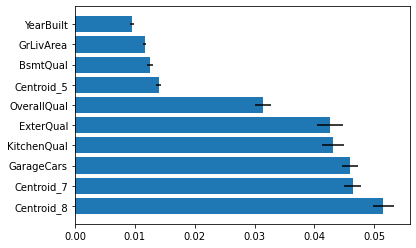

In [37]:
fig, ax = plt.subplots()

indices = r.importances_mean.argsort()[::-1][:10]
plt.barh(range(len(indices)), r.importances_mean[indices], xerr=r.importances_std[indices])

ax.set_yticks(range(len(indices)))
_ = ax.set_yticklabels(np.array(X.columns)[indices])

In [42]:
indices = r.importances_mean.argsort()[::-1][-39:]
X.columns[indices]

Index(['Exterior1st', 'BsmtFinType1', 'YearSold', 'FireplaceQu', 'LotArea',
       'LotShape', 'ExterCond', 'Centroid_4', 'KitchenAbvGr', 'Foundation',
       'LotFrontage', 'LandSlope', 'PavedDrive', 'GarageFinish',
       'TotRmsAbvGrd', 'Condition1', 'LotConfig', 'HouseStyle',
       'EnclosedPorch', 'BsmtCond', 'GarageCond', 'GarageQual', 'Alley',
       'BsmtFinType2', 'Fence', 'BsmtHalfBath', 'BsmtFinSF2', 'Electrical',
       'MiscVal', 'RoofMatl', 'Threeseasonporch', 'MiscFeature',
       'LowQualFinSF', 'Heating', 'PoolArea', 'PoolQC', 'Utilities',
       'Condition2', 'Street'],
      dtype='object')

In [43]:
X1 = X.drop(columns=X.columns[indices.tolist()])

In [34]:
score_dataset(X1, y)

0.14549657102948282

(c) Use the [Boruta](https://pdfs.semanticscholar.org/ecc2/ca3150dc4d4d8dceedab244114f191e05742.pdf) to perform feature selection. How many features does Boruta select in this example? Then, use the selected features to perform regression and calculate the RMLSE using the `scoring_rmsle` function. Finally, make some comments comparing with (a) and (b).

Hint: It may take some time to perform the Boruta. The categorical variables should be label encoded when using Boruta.

In [91]:
!pip install Boruta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 56 kB 2.3 MB/s 


In [101]:
from boruta import BorutaPy

In [102]:
# Label encoding for categoricals
for colname in X.select_dtypes(["category", "object"]):
    X[colname], _ = X[colname].factorize()

In [104]:
# define Boruta feature selection method
feat_selector = BorutaPy(model, n_estimators='auto', verbose=2, random_state=1)

In [105]:
# find all relevant features 
feat_selector.fit(X.values, y.values)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	89
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	89
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	89
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	89
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	89
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	89
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	89
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	37
Tentative: 	24
Rejected: 	28
Iteration: 	9 / 100
Confirmed: 	37
Tentative: 	24
Rejected: 	28
Iteration: 	10 / 100
Confirmed: 	37
Tentative: 	24
Rejected: 	28
Iteration: 	11 / 100
Confirmed: 	37
Tentative: 	24
Rejected: 	28
Iteration: 	12 / 100
Confirmed: 	40
Tentative: 	21
Rejected: 	28
Iteration: 	13 / 100
Confirmed: 	40
Tentative: 	21
Rejected: 	28
Iteration: 	14 / 100
Confirmed: 	40
Tentative: 	21
Rejected: 	28
Iteration: 	15 / 100
Confirmed: 	40
Tentative: 	20
Rejected: 	29
Iteration: 	16 / 100
Confirmed: 	42
Tentative: 	

BorutaPy(estimator=ExtraTreesRegressor(n_estimators=103,
                                       random_state=RandomState(MT19937) at 0x7F7558C0C9E0),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7F7558C0C9E0, verbose=2)

In [106]:
X2 = X.iloc[:,feat_selector.support_.tolist()]

In [107]:
X2

,MSSubClass,MSZoning,LotArea,LandContour,Neighborhood,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,Centroid_0,Centroid_1,Centroid_2,Centroid_3,Centroid_4,Centroid_5,Centroid_6,Centroid_7,Centroid_8,Centroid_9
0,0,0,31770.0,0,0,0,0,0,1960,1960,...,2.977514,4.324979,4.172115,3.780258,16.792665,3.696276,3.032162,3.912313,13.097627,1.677604
1,0,1,11622.0,0,0,0,1,1,1961,1961,...,1.969544,1.879362,4.654799,2.754284,19.594509,0.461371,3.852233,1.941728,15.785445,5.026636
2,0,0,14267.0,0,0,0,0,1,1958,1958,...,0.644657,2.716520,3.743687,2.616186,19.030448,1.650239,2.135609,2.888012,14.058973,3.965749
3,0,0,11160.0,0,0,0,2,0,1968,1968,...,2.868083,5.244512,3.885630,4.432911,19.392116,4.576079,0.995900,5.513141,11.373003,4.586658
4,1,0,13830.0,0,1,0,1,0,1997,1998,...,2.333623,1.313746,2.689990,0.738670,19.225117,2.175157,3.569021,2.691082,14.749591,4.469214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,6,0,7937.0,0,22,0,0,1,1984,1984,...,1.530951,1.868376,4.422977,2.623370,19.983709,0.237774,3.464557,2.095992,15.515254,5.185956
2926,0,0,8885.0,3,22,0,1,0,1983,1983,...,1.961062,1.785543,4.675534,2.747987,19.937172,0.257994,3.887002,1.888941,15.897940,5.303318
2927,4,0,10441.0,0,22,0,1,0,1992,1992,...,1.718819,1.842252,4.492302,2.637712,19.701445,0.234517,3.625175,1.909836,15.610602,5.004958
2928,0,0,10010.0,0,22,0,1,0,1974,1975,...,0.146882,2.752311,3.678552,2.633792,19.548612,1.731053,1.922301,3.012923,14.012415,4.411214


In [108]:
score_dataset(X2, y)

0.14612743782319698

Boruta selects 51 features. Although the loss of (a)~(c) are quite similar, (b) and (c) use fewer parameters than (a) which may be an advantage when considering the generalization.